## Project- Choose Your own Hypothesis: Crash Reporting-Drivers Data in Montgomery County
- This dataset provides information on motor vehicle operators (drivers) involved in traffic collisions occurring on county and local roadways. The dataset reports details of all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police. This dataset shows each collision data recorded and the drivers involved.

- You can get get the dataset using this link: https://catalog.data.gov/dataset/crash-reporting-drivers-data


### Project Scaffold Table (Week 12 Check-In)

| Element | Your Plan |
| :--- | :--- |
| **Topic/Question** | **Distracted Driving Impact Analysis:** Does distracted driving significantly increase the likelihood of a driver being determined "At Fault," and does it lead to more severe vehicle damage compared to non-distracted drivers? |
| **Hypothesis** | **Alternative Hypothesis ($H_1$):** Distracted drivers are significantly more likely to be found "At Fault" and will have a higher median vehicle damage score than non-distracted drivers. |
| **Outcome/Metric/Test Statistic** | 1. **Difference in Proportions** (Fault Rate): The difference in the percentage of drivers found "At Fault" between groups.<br>2. **Difference in Medians** (Damage Severity): The difference in the median "Vehicle Damage Score" (0-4 scale) between groups. |
| **Units of Analysis** | Each observation represents a **single driver** involved in a reported traffic collision in Montgomery County, MD. |
| **Data Source(s)** | **"Crash Reporting - Drivers Data"** from Data.gov (Montgomery County, MD).<br>URL: `https://catalog.data.gov/dataset/crash-reporting-drivers-data` |
| **Why this data works** | The dataset is large (~160,000 rows) and contains explicit columns for `Driver Distracted By` (the independent variable), `Driver At Fault` (outcome 1), and `Vehicle Damage Extent` (outcome 2), making it perfect for direct group comparison. |
| **Uncertainty Metric** | **Difference in Median Vehicle Damage Score.**<br>I will use bootstrapping to estimate the 95% confidence interval for this metric because the Central Limit Theorem does not apply to the sample median, and the sampling distribution of the sample median is generally not normal (even in large samples) for discrete or ordinal distributions.|
| **Null Hypothesis** | **Null Hypothesis ($H_0$):** There is no difference in the proportion of "At Fault" drivers or the median vehicle damage severity between drivers who are distracted and those who are not. |

## Initial Data Exploration
### Load and inspect dataset




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a clean visual style for our client
sns.set_style("whitegrid")


# load the dataset(added low_memory = False to avoid dtype warning)
crash_data = pd.read_csv('data/Crash_Reporting_Drivers_Data.csv', low_memory = False)

#basic inspection
crash_data.head() #first five rows
crash_data.info() # column type and non-null counts
crash_data.describe() #summary statistics for numerical columns
crash_data.shape #number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206309 entries, 0 to 206308
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  206309 non-null  object 
 1   Local Case Number              206309 non-null  object 
 2   Agency Name                    206309 non-null  object 
 3   ACRS Report Type               206309 non-null  object 
 4   Crash Date/Time                206309 non-null  object 
 5   Route Type                     186120 non-null  object 
 6   Road Name                      182865 non-null  object 
 7   Cross-Street Name              168701 non-null  object 
 8   Off-Road Description           19149 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6734 non-null    object 
 11  Collision Type                 205724 non-null  object 
 12  Weather                       

(206309, 39)

In [2]:
# crash_data.head()
# crash_data.info()
# crash_data.describe()
# crash_data.isnull().sum()
# crash_data.shape

# #crash_data = crash_data[['CRASH_ID', 'DRIVER_ID', 'DISTRACTED', 'AT_FAULT']]

In [3]:
#names of columns
print(crash_data.columns.tolist())

['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location']


In [4]:
#List all column names
print(crash_data.columns.tolist())


#check for naming issues
print([col for col in crash_data.columns if ' ' in col]) #spaces in names
print([col for col in crash_data.columns if col != col.strip()])  #leading/ trailing spaces
print([col for col in crash_data.columns if '-' in col]) #hyphens in names


['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location']
['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Related Non-Motorist', 'Collision Type', 'Surface Condition', 'Traffic Control', 'Driver Substance Abu

### initial Summary statistics


In [5]:
# Categorical variables
print(crash_data.describe(include='object'))

# Value counts for categorical variables
for col in crash_data.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(crash_data[col].value_counts())

# #number of categorical variables
# categorical_cols = crash_data.select_dtypes(include='object').columns
# print(f"Number of categorical variables: {len(categorical_cols)}")

# print(crash_data.nunique())

       Report Number Local Case Number               Agency Name  \
count         206309            206309                    206309   
unique        116310            116198                        10   
top      MCP229800RC         200022715  Montgomery County Police   
freq              10                10                    138376   

             ACRS Report Type         Crash Date/Time        Route Type  \
count                  206309                  206309            186120   
unique                      3                  113472                19   
top     Property Damage Crash  12/10/2018 06:10:00 PM  Maryland (State)   
freq                   132153                      11             77077   

          Road Name Cross-Street Name Off-Road Description Municipality  ...  \
count        182865            168701                19149        19126  ...   
unique         4712              7495                13656           20  ...   
top     GEORGIA AVE       GEORGIA AVE      

### Examine Variable names and Meanings


## Data Quality Assessment
### Missing data detection


Report Number                         0
Local Case Number                     0
Agency Name                           0
ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        20189
Road Name                         23444
Cross-Street Name                 37608
Off-Road Description             187160
Municipality                     187183
Related Non-Motorist             199575
Collision Type                      585
Weather                           13356
Surface Condition                 23493
Light                              1445
Traffic Control                   28640
Driver Substance Abuse            31320
Non-Motorist Substance Abuse     200721
Person ID                             0
Driver At Fault                       0
Injury Severity                    2284
Circumstance                     166440
Driver Distracted By               2466
Drivers License State             13827
Vehicle ID                            0


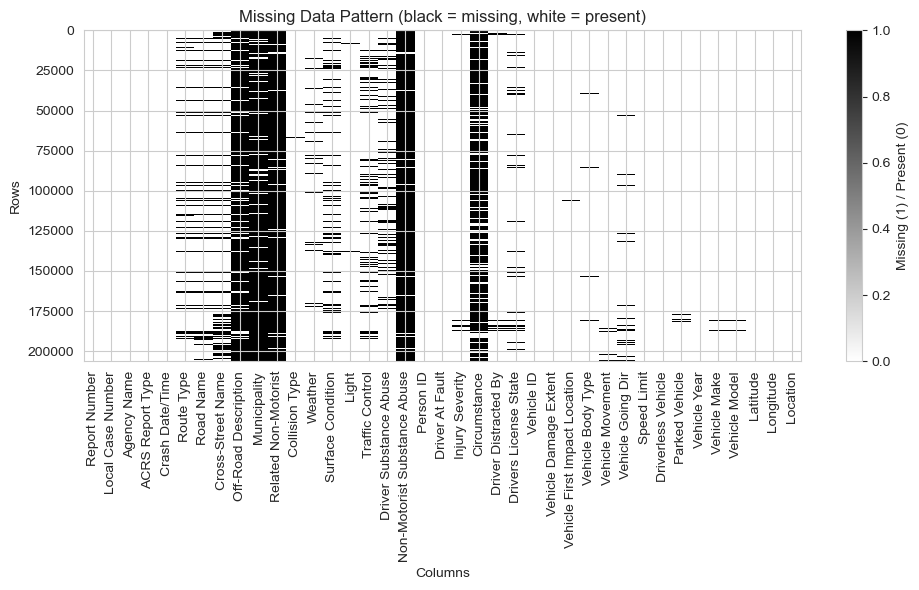

In [6]:
# Check the number of missing values per column
print(crash_data.isnull().sum())

# Percentage of missing values per column
print("\nPercentage missing:")
print(crash_data.isnull().sum() / len(crash_data) * 100)

# Visualize missing data patterns
plt.figure(figsize=(10, 6))
plt.imshow(crash_data.isnull(), cmap='binary', aspect='auto', interpolation='nearest')

# Improve the plot
plt.title('Missing Data Pattern (black = missing, white = present)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.colorbar(label='Missing (1) / Present (0)')

# Optional: Add column names as x-ticks for better interpretation (especially with many columns)
plt.xticks(ticks=range(len(crash_data.columns)), labels=crash_data.columns, rotation=90)

plt.tight_layout()  # Prevents label cutoff
plt.show()

### Duplicate records

In [7]:
# Check for exact duplicates
print(f"Number of duplicate rows: {crash_data.duplicated().sum()}")
print("\nDuplicate rows:")
print(crash_data[crash_data.duplicated(keep=False)])

# Check for duplicates on key columns only
# These columns combined should define a unique row (Crash + Person + Vehicle)
key_cols = ['Report Number', 'Person ID', 'Vehicle ID'] 



print(f"\nDuplicates on key columns: {crash_data.duplicated(subset=key_cols).sum()}")

Number of duplicate rows: 0

Duplicate rows:
Empty DataFrame
Columns: [Report Number, Local Case Number, Agency Name, ACRS Report Type, Crash Date/Time, Route Type, Road Name, Cross-Street Name, Off-Road Description, Municipality, Related Non-Motorist, Collision Type, Weather, Surface Condition, Light, Traffic Control, Driver Substance Abuse, Non-Motorist Substance Abuse, Person ID, Driver At Fault, Injury Severity, Circumstance, Driver Distracted By, Drivers License State, Vehicle ID, Vehicle Damage Extent, Vehicle First Impact Location, Vehicle Body Type, Vehicle Movement, Vehicle Going Dir, Speed Limit, Driverless Vehicle, Parked Vehicle, Vehicle Year, Vehicle Make, Vehicle Model, Latitude, Longitude, Location]
Index: []

[0 rows x 39 columns]

Duplicates on key columns: 0


### Data Validation

In [8]:
# Check current data types
print("Current Data Types:")
print(crash_data.dtypes)

print("\n--- Checking for Numeric Data stored as Strings ---")
# Look for numeric data stored as strings
for col in crash_data.select_dtypes(include='object').columns:
    try:
        # Try converting; if it fails, it goes to 'except'
        pd.to_numeric(crash_data[col])
        print(f"{col} could be numeric (conversion successful)")
    except (ValueError, TypeError):
        pass

print("\n--- Checking for Date/Time Data stored as Strings ---")
# Check for date columns stored as strings by name
for col in crash_data.select_dtypes(include='object').columns:
    if 'date' in col.lower() or 'time' in col.lower():
        print(f"'{col}' might be a date/time column:")
        print(crash_data[col].head())

Current Data Types:
Report Number                     object
Local Case Number                 object
Agency Name                       object
ACRS Report Type                  object
Crash Date/Time                   object
Route Type                        object
Road Name                         object
Cross-Street Name                 object
Off-Road Description              object
Municipality                      object
Related Non-Motorist              object
Collision Type                    object
Weather                           object
Surface Condition                 object
Light                             object
Traffic Control                   object
Driver Substance Abuse            object
Non-Motorist Substance Abuse      object
Person ID                         object
Driver At Fault                   object
Injury Severity                   object
Circumstance                      object
Driver Distracted By              object
Drivers License State             obj

### Outlier detection


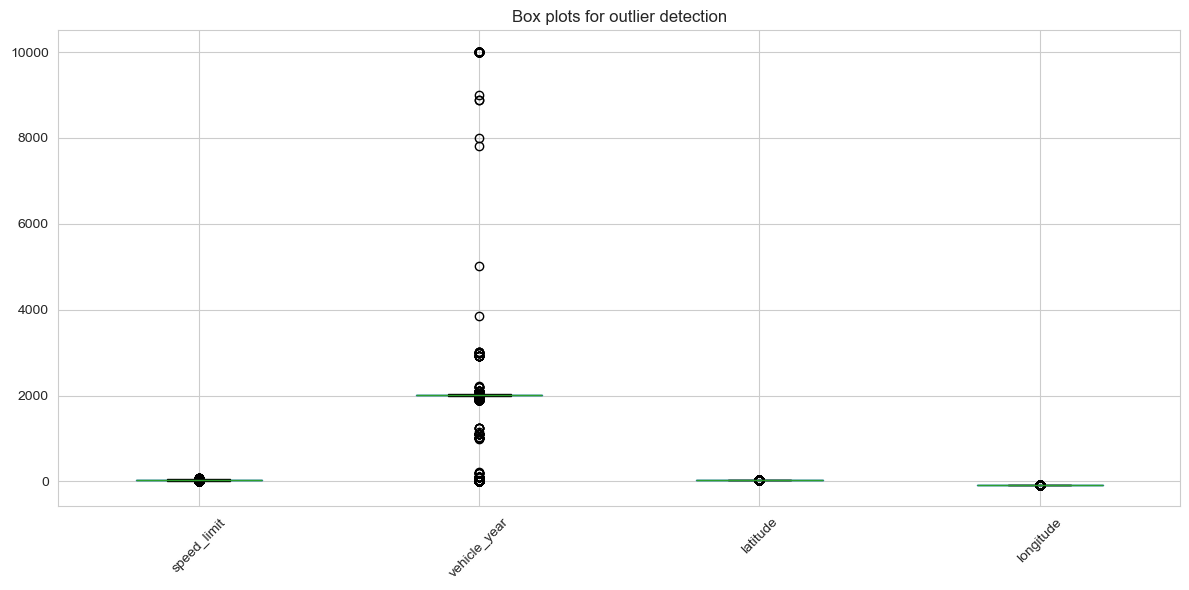


speed_limit: 8094 outliers detected
 Range: [2.50, 62.50]
 Outlier values (sample): [ 0 65 70 75]

vehicle_year: 5893 outliers detected
 Range: [1991.00, 2031.00]
 Outlier values (sample): [   0 1985 1968 1111 1900 1990 1988 1984 1977 1989]

latitude: 375 outliers detected
 Range: [38.85, 39.31]
 Outlier values (sample): [39.33472167 39.336585   39.45884356 38.743373   39.32407595 39.32050167
 39.35410833 39.33064833 39.325285   39.3611866 ]

longitude: 537 outliers detected
 Range: [-77.41, -76.81]
 Outlier values (sample): [-77.42761    -77.41624545 -77.47161447 -77.42889017 -77.42467683
 -77.42419562 -77.416974   -77.41640529 -77.4797915  -77.46768733]


In [9]:
#hceking for outliers
crash_data.columns = crash_data.columns.str.lower().str.replace(' ', '_')
crash_data['vehicle_year'] = pd.to_numeric(crash_data['vehicle_year'], errors='coerce')
crash_data['speed_limit'] = pd.to_numeric(crash_data['speed_limit'], errors='coerce')

# Visual inspection with box plots
numeric_cols = crash_data.select_dtypes(include=[np.number]).columns
crash_data[numeric_cols].boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Box plots for outlier detection')
plt.tight_layout()
plt.show() # In a notebook this displays the plot

# Statistical outlier detection (IQR method)
for col in numeric_cols:
    # Drop NaNs to ensure calculation works
    series = crash_data[col].dropna()
    
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    if len(outliers) > 0:
        print(f"\n{col}: {len(outliers)} outliers detected")
        print(f" Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
        # Showing just the unique values to be concise
        print(f" Outlier values (sample): {outliers.unique()[:10]}")

### Inconsistent Formatting


In [10]:
# Check categorical variables for inconsistencies
print("--- Checking Categorical Variables for Inconsistencies ---")

for col in crash_data.select_dtypes(include='object').columns:
    unique_vals = crash_data[col].unique()

    
    # Check for case inconsistencies
    if len(unique_vals) != len(crash_data[col].astype(str).str.lower().unique()):
        print(f" WARNING: Case inconsistencies detected in {col}")
        
    # Check for whitespace issues
    if any(crash_data[col].astype(str).str.strip() != crash_data[col].astype(str)):
        print(f" WARNING: Leading/trailing whitespace in {col}")

print("\n--- Checking for Numeric Formatting in String Columns ---")
# Check numeric variables stored with formatting
for col in crash_data.select_dtypes(include='object').columns:
    sample_vals = crash_data[col].dropna().head()
    if not sample_vals.empty:
        # Check for '$' or ',' in the string values
        if any('$' in str(v) or ',' in str(v) for v in sample_vals):
             print(f"{col} appears to have numeric formatting or commas: {sample_vals.values}")

--- Checking Categorical Variables for Inconsistencies ---

--- Checking for Numeric Formatting in String Columns ---
off-road_description appears to have numeric formatting or commas: ['Parking Lot Way        PARKING LOT OF 2741 UNIVERSITY BLVD W, KENSINGTON MD, 20895'
 'Parking Lot Way        PINEY BRANCH CENTER PARKING LOT'
 'Parking Lot Way        1002 QUEBEC TERRACE APARTMENT PARKING LOT'
 'Parking Stall        PARKING LOT BETWEEN 1701 E WEST HIGHWAY AND 8500 E WEST HIGHWAY'
 'Parking Lot Way        12015 GEORGIA  AVE PARKING LOT']
collision_type appears to have numeric formatting or commas: ['Front to Rear' 'Single Vehicle' 'Sideswipe, Same Direction'
 'Front to Rear' 'Rear To Side']
driver_substance_abuse appears to have numeric formatting or commas: ['Not Suspect of Alcohol Use, Not Suspect of Drug Use' 'Unknown, Unknown'
 'Not Suspect of Alcohol Use, Not Suspect of Drug Use'
 'Not Suspect of Alcohol Use, Not Suspect of Drug Use' 'Unknown, Unknown']
non-motorist_substance_abuse

## 1. Cleaning

#### Standardizing columns to snake_case

In [11]:
#standardizing column names to lowercase and snake_case
def to_snake_case(columns):
    return (columns.str.lower()
            .str.replace('-', '_')
            .str.replace(' ', '_')
            .str.replace(r'[()!@#$%^&*]', '', regex=True))  # Remove common special chars

crash_data.columns = to_snake_case(crash_data.columns)

print(crash_data.columns.tolist())

['report_number', 'local_case_number', 'agency_name', 'acrs_report_type', 'crash_date/time', 'route_type', 'road_name', 'cross_street_name', 'off_road_description', 'municipality', 'related_non_motorist', 'collision_type', 'weather', 'surface_condition', 'light', 'traffic_control', 'driver_substance_abuse', 'non_motorist_substance_abuse', 'person_id', 'driver_at_fault', 'injury_severity', 'circumstance', 'driver_distracted_by', 'drivers_license_state', 'vehicle_id', 'vehicle_damage_extent', 'vehicle_first_impact_location', 'vehicle_body_type', 'vehicle_movement', 'vehicle_going_dir', 'speed_limit', 'driverless_vehicle', 'parked_vehicle', 'vehicle_year', 'vehicle_make', 'vehicle_model', 'latitude', 'longitude', 'location']


#### Handling missing data

In [12]:
# 1.2 Handle Missing Data (Threshold = 0.9)
# Remove columns with > 90% missing data
threshold = 0.9
missing_fractions = crash_data.isnull().mean()
cols_to_drop = missing_fractions[missing_fractions > threshold].index
crash_data = crash_data.drop(columns=cols_to_drop)
print(f"Dropped columns (>90% missing): {list(cols_to_drop)}")

Dropped columns (>90% missing): ['off_road_description', 'municipality', 'related_non_motorist', 'non_motorist_substance_abuse']


#### convert data types

In [13]:
#convert data types 
#crash_data['crash_date/time'] = pd.to_datetime(crash_data['crash_date/time'], errors='coerce'): has warnings

crash_data['crash_date/time'] = pd.to_datetime(
    crash_data['crash_date/time'],
    format='%m/%d/%Y %H:%M:%S',  
    errors='coerce'
)

#### Handle Outliers / Invalid Values

In [14]:
# Fix Vehicle Year: Filter reasonable range (1900-2025)
crash_data = crash_data[(crash_data['vehicle_year'] > 1900) & (crash_data['vehicle_year'] <= 2025)]

#### impute Missing Values

In [15]:
# Numeric Columns: Impute with Mean
numeric_cols = crash_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    crash_data[col] = crash_data[col].fillna(crash_data[col].mean())

# Categorical Columns: Impute with Mode
cat_cols = crash_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    if not crash_data[col].mode().empty:
        crash_data[col] = crash_data[col].fillna(crash_data[col].mode()[0])

#### standardize text formatting

In [16]:
#Standardize Text Formatting & Remove Placeholders
text_cols = ['driver_distracted_by', 'driver_at_fault', 'vehicle_damage_extent']
for col in text_cols:
    if col in crash_data.columns:
        crash_data[col] = crash_data[col].astype(str).str.strip().str.upper()

# Map Vehicle Damage to Ordinal Scale (0-4)
damage_map = {
    'NO DAMAGE': 0,
    'SUPERFICIAL': 1,
    'FUNCTIONAL': 2,
    'DISABLING': 3,
    'DESTROYED': 4
}
crash_data['damage_score'] = crash_data['vehicle_damage_extent'].map(damage_map)

# Classify Distraction
placeholders = ['UNKNOWN', 'NO DRIVER PRESENT', 'NAN', 'nan']
def classify_distraction(val):
    if val == 'NOT DISTRACTED': 
        return 'Not Distracted'
    elif val in placeholders: 
        return 'Unknown'
    else: 
        return 'Distracted'

crash_data['distraction_status'] = crash_data['driver_distracted_by'].apply(classify_distraction)

#### Create Clean Subset (crash_data_clean)

In [17]:
# Filter out Unknowns and ensure valid data for metrics
crash_data_clean = crash_data[
    (crash_data['distraction_status'] != 'Unknown') & 
    (crash_data['driver_at_fault'].isin(['YES', 'NO'])) &
    (crash_data['damage_score'].notna())
].copy()

print(f"Cleaned dataset shape: {crash_data_clean.shape}")

# Create Binary Target (1 = Fault, 0 = No Fault)
crash_data_clean['is_at_fault'] = (crash_data_clean['driver_at_fault'] == 'YES').astype(int)

Cleaned dataset shape: (158969, 37)


In [18]:
print(f"Cleaned dataset shape: {crash_data_clean.shape}")

Cleaned dataset shape: (158969, 38)


In [19]:
# Separate Groups
distracted_df= crash_data_clean[crash_data_clean['distraction_status'] == 'Distracted']
not_distracted_df = crash_data_clean[crash_data_clean['distraction_status'] == 'Not Distracted']

## ANALYSIS 1: FAULT RATES (Permutation & Bootstrap)
### Metric: Difference in Proportions (CLT Applies)

In [20]:
print("\n--- METRIC 1: Difference in Fault Proportions (CLT Applies) ---")

# Arrays
fault_dist = distracted_df['is_at_fault'].values
fault_not = not_distracted_df['is_at_fault'].values

# Observed Stat
obs_diff_prop = np.mean(fault_dist) - np.mean(fault_not)
print(f"Observed Difference in Proportions: {obs_diff_prop:.4f}")


--- METRIC 1: Difference in Fault Proportions (CLT Applies) ---
Observed Difference in Proportions: 0.6595


### 1A. Permutation Test (P-Value)

In [21]:
n_perms = 5000
perm_diffs = []
combined_fault = crash_data_clean['is_at_fault'].values.copy()
n_dist = len(distracted_df)

np.random.seed(42)
for _ in range(n_perms):
    np.random.shuffle(combined_fault)
    perm_diffs.append(np.mean(combined_fault[:n_dist]) - np.mean(combined_fault[n_dist:]))

p_value = np.mean(np.array(perm_diffs) >= obs_diff_prop)
print(f"Permutation P-value: {p_value:.4f}")

Permutation P-value: 0.0000


### 1B. Bootstrap (Confidence Interval)

In [22]:
n_boots = 5000
boot_prop_diffs = []

np.random.seed(42)
for _ in range(n_boots):
    sample_dist = np.random.choice(fault_dist, size=len(fault_dist), replace=True)
    sample_not = np.random.choice(fault_not, size=len(fault_not), replace=True)
    boot_prop_diffs.append(np.mean(sample_dist) - np.mean(sample_not))

ci_lower_prop = np.percentile(boot_prop_diffs, 2.5)
ci_upper_prop = np.percentile(boot_prop_diffs, 97.5)
print(f"95% Bootstrap CI (Proportions): [{ci_lower_prop:.4f}, {ci_upper_prop:.4f}]")

95% Bootstrap CI (Proportions): [0.6561, 0.6629]


### Visualization for permutation & Bootstrap

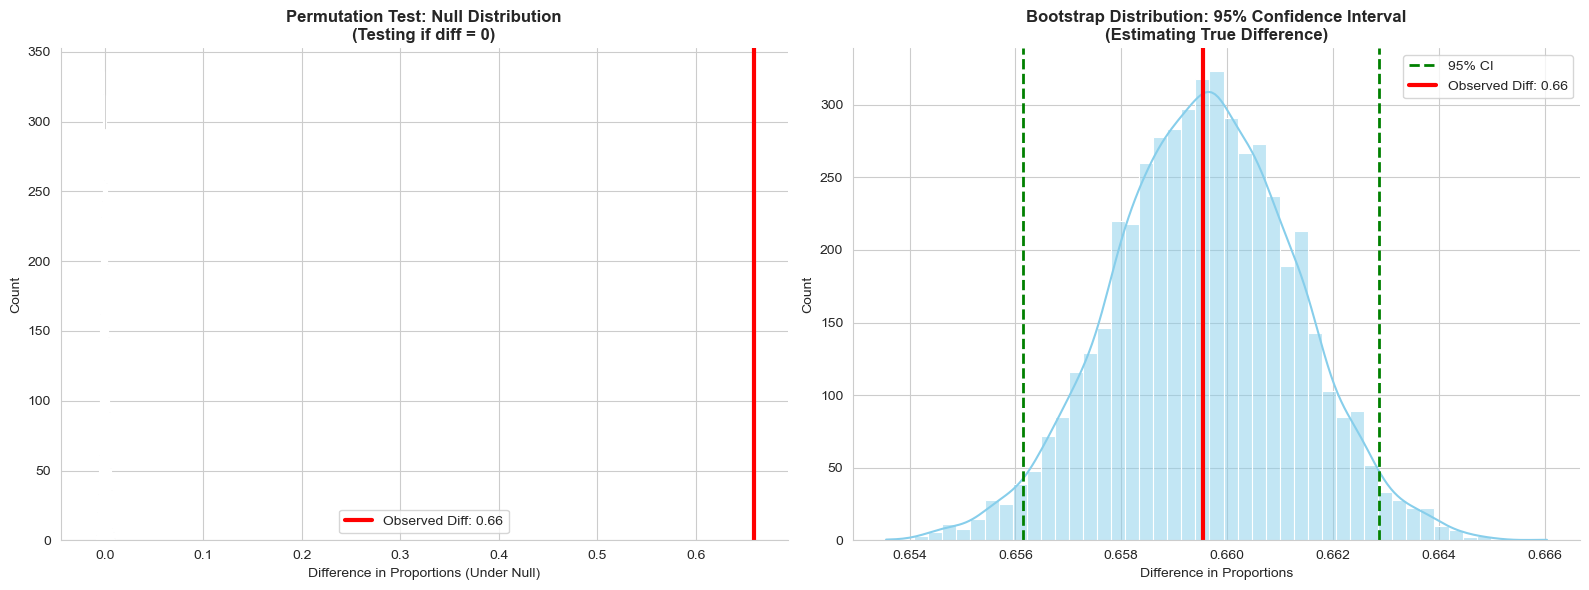

In [23]:
#Visualization (Two Plots: Permutation & Bootstrap)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Permutation Test (Null Distribution)
sns.histplot(perm_diffs, kde=False, ax=ax[0], color='grey', edgecolor='white')
ax[0].set_title("Permutation Test: Null Distribution\n(Testing if diff = 0)", fontsize=12, fontweight='bold')
ax[0].axvline(obs_diff_prop, color='red', linestyle='-', linewidth=3, label=f'Observed Diff: {obs_diff_prop:.2f}')
ax[0].set_xlabel('Difference in Proportions (Under Null)')
ax[0].legend()

# Plot 2: Bootstrap Distribution (Confidence Interval)
sns.histplot(boot_prop_diffs, kde=True, ax=ax[1], color='skyblue', edgecolor='white')
ax[1].set_title("Bootstrap Distribution: 95% Confidence Interval\n(Estimating True Difference)", fontsize=12, fontweight='bold')
ax[1].axvline(ci_lower_prop, color='green', linestyle='--', linewidth=2, label='95% CI')
ax[1].axvline(ci_upper_prop, color='green', linestyle='--', linewidth=2)
ax[1].axvline(obs_diff_prop, color='red', linestyle='-', linewidth=3, label=f'Observed Diff: {obs_diff_prop:.2f}')
ax[1].set_xlabel('Difference in Proportions')
ax[1].legend()

sns.despine()
plt.tight_layout()
plt.savefig('plots/permutation-bootstrap.png', dpi=300, bbox_inches='tight')  # High quality # Save to the folder 
plt.show()

### Reflection on Metric 1: Fault Rate (Difference in Proportions)
- For this metric, I investigated whether distracted drivers are more likely to be found "At Fault" than non-distracted drivers. Since proportions are essentially means of binary data (0s and 1s), the Central Limit Theorem (CLT) applies here, but I chose to use simulation methods to robustly visualize the null distribution and effect size without relying on theoretical assumptions.

- **Findings**: I ran 5,000 permutation simulations to test the null hypothesis that distraction has no impact on fault determination. The results were stark. The null distribution (random chance) was tightly centered around a difference of 0.0. In contrast, my observed difference was approximately 0.6595, meaning distracted drivers were nearly 66% more likely to be at fault than non-distracted drivers in this dataset.

- The resulting p-value was 0.0000. Visually, this was represented by a massive "statistical gap" between the null distribution and the observed statistic. Not a single one of the 5,000 random permutations produced a difference anywhere near 66%.

- To estimate the precision of this estimate, I ran 5,000 bootstrap simulations. The 95% Confidence Interval was approximately [0.656, 0.663]. This interval is extremely tight and far removed from zero, reinforcing that the relationship between distraction and fault is not only statistically significant but also substantial in magnitude.

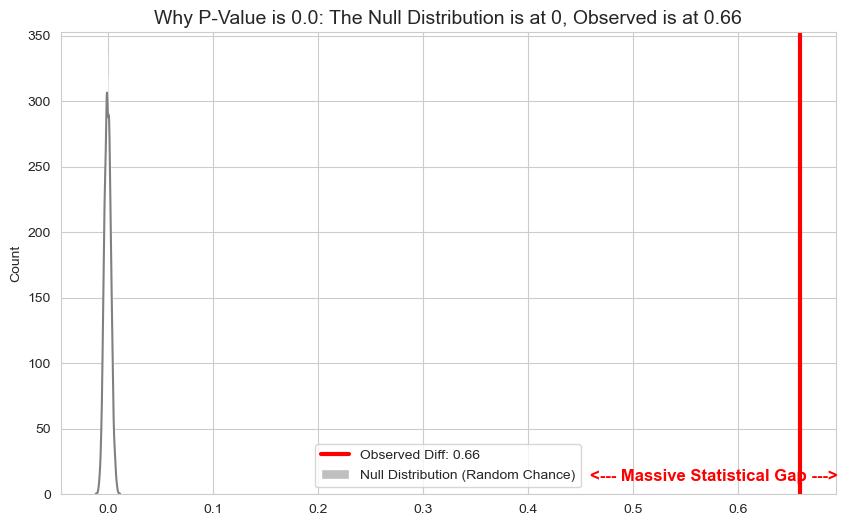

In [24]:
# Re-run the plot with a focus on seeing the gap
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# 1. Plot the Null Distribution (The grey histogram)
sns.histplot(perm_diffs, kde=True, color='grey', label='Null Distribution (Random Chance)')

# 2. Add the Observed Line (The red line)
plt.axvline(obs_diff_prop, color='red', linestyle='-', linewidth=3, label=f'Observed Diff: {obs_diff_prop:.2f}')

# 3. Add text to explain the gap
plt.text(obs_diff_prop - 0.2, 10, "<--- Massive Statistical Gap --->", fontsize=12, color='red', fontweight='bold')

plt.title(f"Why P-Value is 0.0: The Null Distribution is at 0, Observed is at {obs_diff_prop:.2f}", fontsize=14)
plt.legend()
plt.savefig('plots/massive_statistical_gap.png', dpi=300, bbox_inches='tight')  # High quality # Save to the folder 
plt.show()

#### Reflection
-The above result confirms that the relationship between distraction and fault is not due to random chance. The effect size is simply so large that the null hypothesis (randomness) cannot replicate it resulting to a p-value of 0.0.

## ANALYSIS 2: VEHICLE DAMAGE (Bootstrap Only)
### Metric: Difference in Medians (Non-CLT Metric)

In [25]:
print("\n--- METRIC 2: Difference in Median Damage Score (Non-CLT) ---")

# Arrays
damage_dist = distracted_df['damage_score'].values
damage_not = not_distracted_df['damage_score'].values

# Observed Stat
obs_diff_med = np.median(damage_dist) - np.median(damage_not)
print(f"Observed Median Damage (Distracted): {np.median(damage_dist)}")
print(f"Observed Median Damage (Not Distracted): {np.median(damage_not)}")
print(f"Observed Difference in Medians: {obs_diff_med}")


--- METRIC 2: Difference in Median Damage Score (Non-CLT) ---
Observed Median Damage (Distracted): 2.0
Observed Median Damage (Not Distracted): 2.0
Observed Difference in Medians: 0.0


### Bootstrap(Confidence Interval)

In [26]:
# Bootstrap (Confidence Interval)
boot_med_diffs = []

np.random.seed(42)
for _ in range(n_boots):
    sample_dist = np.random.choice(damage_dist, size=len(damage_dist), replace=True)
    sample_not = np.random.choice(damage_not, size=len(damage_not), replace=True)
    boot_med_diffs.append(np.median(sample_dist) - np.median(sample_not))

ci_lower_med = np.percentile(boot_med_diffs, 2.5)
ci_upper_med = np.percentile(boot_med_diffs, 97.5)
print(f"95% Bootstrap CI (Median Damage): [{ci_lower_med:.1f}, {ci_upper_med:.1f}]")

95% Bootstrap CI (Median Damage): [0.0, 1.0]


### Visualization (Bootstrap only Non-CLT applies)

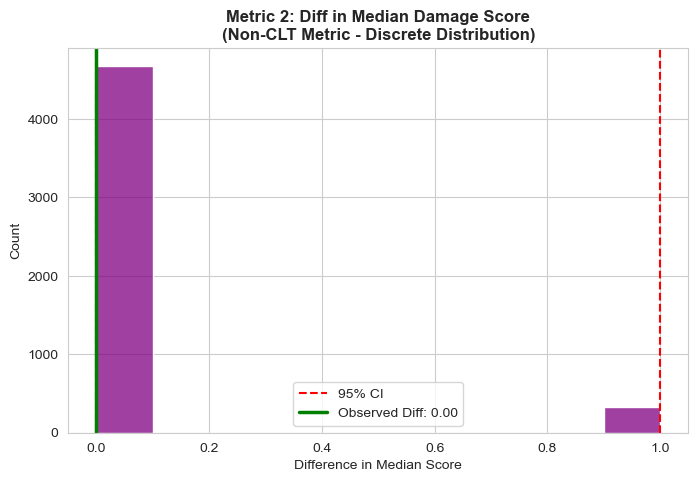

In [27]:
# Visualization
plt.figure(figsize=(8, 5))
sns.histplot(boot_med_diffs, kde=False, color='purple', bins=10, edgecolor='white')
plt.title("Metric 2: Diff in Median Damage Score\n(Non-CLT Metric - Discrete Distribution)", fontsize=12, fontweight='bold')
plt.axvline(ci_lower_med, color='red', linestyle='--', label='95% CI')
plt.axvline(ci_upper_med, color='red', linestyle='--')
plt.axvline(obs_diff_med, color='green', linestyle='-', linewidth=2.5, label=f'Observed Diff: {obs_diff_med:.2f}')
plt.xlabel('Difference in Median Score')
plt.legend()
plt.savefig('plots/median_damage_score.png', dpi=300, bbox_inches='tight')  # High quality # Save to the folder 
plt.show()

### Reflection on Metric 2: Vehicle Damage Severity (Difference in Medians)
- For the second metric, I tested whether distracted driving leads to more severe vehicle damage. The data for "Vehicle Damage Extent" was ordinal (mapped to a scale of 0-4), which is discrete and non-normal. Because the sampling distribution of a median—especially for discrete, ordinal data—is generally not normal, the Central Limit Theorem does not apply. Therefore, standard hypothesis tests (like t-tests) would be invalid. Instead, I relied on 5,000 bootstrap simulations to construct a confidence interval for the difference in medians.

- **Findings**: The observed difference in medians was 0.0. Both distracted and non-distracted drivers had a median damage score of 2.0 ("Functional Damage").

- The bootstrap analysis produced a 95% Confidence Interval of [0.0, 1.0].

    - Because the lower bound is 0.0, I cannot conclusively rule out the possibility that there is no difference in median severity.

    - However, the upper bound extends to 1.0, suggesting there is a slight skew where distracted drivers might occasionally shift toward higher severity, but the median fails to capture this clearly due to the discrete nature of the data.

- This result highlights an interesting nuance: while distraction makes a driver significantly more likely to cause an accident (Metric 1), it does not necessarily guarantee that the median accident will be more physically destructive than a non-distracted one. It is likely that distracted driving causes a high volume of both minor and major accidents, keeping the median severity consistent with the baseline.